# Développez une preuve de concept

### Projet

Ce projet implique une veille active sur la data science, des tests d'algorithmes sur un jeu de données choisi, et des comparaisons avec des méthodes éprouvées.

### 1. Introduction

- Présentation du projet
- Objectif de l'analyse de crédit
- Importance de l'analyse de crédit dans le domaine financier

### 2. Collecte et Exploration des Données

- Librairies 

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, jaccard_score, hamming_loss
from sklearn.model_selection import learning_curve
import time

- Importation de la base de données

In [192]:
data = pd.read_csv(r"C:\Users\amous\Developpez_Preuve-concept\Data07.csv", low_memory=False)
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Structure et description des colonnes

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [194]:
data_dictionary = pd.read_csv(r"C:\Users\amous\Developpez_Preuve-concept\LCDataDictionary.csv")
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [195]:
!pip install googletrans==4.0.0-rc1

In [196]:
from googletrans import Translator
# Fonction pour traduire une phrase de l'anglais vers le français
def traduire_en_francais(phrase):
    translator = Translator()
    return translator.translate(phrase, src='en', dest='fr').text

data_dictionary['Description'] = data_dictionary['Description'].apply(traduire_en_francais)
data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,Le nombre de comptes sur lesquels l'emprunteur...
1,acc_open_past_24mths,Le nombre de métiers a ouvert ses portes au co...
2,addr_state,L'État fourni par l'emprunteur dans la demande...
3,all_util,Solde à la limite de crédit à tous les métiers
4,annual_inc,Le revenu annuel autodéclaré fourni par l'empr...
...,...,...
112,verification_status,"Indique si le revenu a été vérifié par LC, non..."
113,verified_status_joint,Indique si le revenu conjoint des co-emprunteu...
114,zip_code,Les 3 premiers numéros du code postal fourni p...
115,NaN,Nan


- Exploration 

In [197]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name'})

data_dtypes = pd.DataFrame(data.dtypes,columns=['dtypes'])
data_dtypes = data_dtypes.reset_index()
data_dtypes['name'] = data_dtypes['index']
data_dtypes = data_dtypes[['name','dtypes']]

data_dtypes['first value'] = data.loc[0].values
preview = data_dtypes.merge(data_dictionary, on='name',how='left')

In [198]:
preview

,name,dtypes,first value,Description
0,id,object,1077501,Un ID attribué à LC unique pour la liste des p...
1,member_id,float64,1296599.0,Un ID attribué à LC unique pour le membre de l...
2,loan_amnt,float64,5000.0,Le montant répertorié du prêt demandé par l'em...
3,funded_amnt,float64,5000.0,Le montant total engagé dans ce prêt à ce mome...
4,funded_amnt_inv,float64,4975.0,Le montant total commis par les investisseurs ...
5,term,object,36 months,Le nombre de paiements sur le prêt.Les valeurs...
6,int_rate,object,10.65%,Taux d'intérêt sur le prêt
7,installment,float64,162.87,Le paiement mensuel due par l'emprunteur si le...
8,grade,object,B,Grade de prêt attribué par LC
9,sub_grade,object,B2,LC attribué à un sol de prêt


In [199]:
drop_list = ['member_id','funded_amnt','funded_amnt_inv','grade','sub_grade','emp_title','issue_d']
data = data.drop(drop_list,axis=1)
data.head(2)

,id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,...,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [200]:
data.loan_status.value_counts()

loan_status
Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: count, dtype: int64

### Classification

Dans notre contexte, la colonne "loan_status" est utilisée comme variable cible (target) pour notre modèle d'apprentissage automatique. Cette colonne décrit si un prêt a été remboursé à temps, s'il a eu des retards de paiement ou s'il a été en défaut de paiement de la part de l'emprunteur. Pour notre analyse, nous étendons la définition de défaut pour inclure les statuts "Tard (31 - 120 jours)" et "Par défaut", en plus des "Facturé".

Donc, dans la perspective de notre modèle, la target représente si un client a fait défaut ou va probablement faire défaut sur son prêt. Cela nous permet de prédire quel emprunteur est le plus risqué pour les investisseurs, ce qui aide à éviter d'investir dans des prêts à haut risque.

In [201]:
mapping_dict = {'loan_status':{'Fully Paid':1,'Charged Off': 0,'Late (31-120 days)': 0,'Default': 0}}
data = data.replace(mapping_dict)
data = data[(data['loan_status'] == 1) | (data['loan_status'] == 0)]
data.head()

,id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,...,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,...,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,1,...,649.91,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,1075269,5000.0,36 months,7.90%,156.46,3 years,RENT,36000.0,Source Verified,1,...,161.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [202]:
data['loan_status'].unique()

array([1, 0], dtype=object)

In [203]:
data.dtypes

id                             object
loan_amnt                     float64
term                           object
int_rate                       object
installment                   float64
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                     object
total_acc                     float64
initial_list_status            object
out_prncp                     float64
out_prncp_in

In [204]:
data['last_pymnt_d'].unique()

array(['Jan-2015', 'Apr-2013', 'Jun-2014', 'May-2016', 'Apr-2012',
       'Nov-2012', 'Jun-2013', 'Sep-2013', 'Jul-2012', 'Oct-2013',
       'May-2013', 'Feb-2015', 'Aug-2015', 'Oct-2012', 'Sep-2012', nan,
       'Dec-2012', 'Dec-2014', 'Aug-2013', 'Nov-2013', 'Jan-2014',
       'Apr-2014', 'Aug-2014', 'Oct-2014', 'Aug-2012', 'Jul-2014',
       'Jul-2013', 'Jan-2016', 'Feb-2016', 'Apr-2015', 'Feb-2014',
       'Sep-2014', 'Jun-2012', 'Feb-2013', 'Jun-2016', 'Mar-2013',
       'May-2014', 'Mar-2015', 'Jan-2013', 'Dec-2013', 'Feb-2012',
       'Mar-2014', 'Sep-2015', 'Nov-2015', 'Mar-2016', 'Jan-2012',
       'Oct-2015', 'Dec-2016', 'Nov-2014', 'Mar-2012', 'May-2012',
       'Aug-2016', 'Jul-2016', 'Oct-2016', 'Dec-2015', 'Jun-2015',
       'Sep-2016', 'Nov-2016', 'May-2015', 'Jul-2015', 'Apr-2016',
       'Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'O

In [205]:
drop_columns = []

for col in data.columns:
    non_null = data[col].dropna()
    unique_non_null = non_null.unique()
    num_true_unique = len(unique_non_null)
    if num_true_unique < 2:
        drop_columns.append(col)
        
data = data.drop(drop_columns, axis=1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [206]:
for col in data.columns:
    if (len(data[col].unique()) < 4):
        print(data[col].value_counts())
        print()

term
 36 months    29096
 60 months    10661
Name: count, dtype: int64

verification_status
Not Verified       16923
Verified           12825
Source Verified    10009
Name: count, dtype: int64

loan_status
1    34085
0     5672
Name: count, dtype: int64



In [207]:
mapping_dict = {
    'emp_length':{
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'n/a': 0
    }
}

data = data.drop(['last_credit_pull_d','addr_state','title','earliest_cr_line'], axis=1)
    
data = data.replace(mapping_dict)
data.head()

,id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000.0,36 months,10.65%,162.87,10.0,RENT,24000.0,Verified,1,...,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,0.0
1,1077430,2500.0,60 months,15.27%,59.83,0.0,RENT,30000.0,Source Verified,0,...,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,0.0
2,1077175,2400.0,36 months,15.96%,84.33,10.0,RENT,12252.0,Not Verified,1,...,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,0.0
3,1076863,10000.0,36 months,13.49%,339.31,10.0,RENT,49200.0,Source Verified,1,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,0.0
5,1075269,5000.0,36 months,7.90%,156.46,3.0,RENT,36000.0,Source Verified,1,...,5632.210000,5632.21,5000.00,632.21,0.00,0.0,0.00,Jan-2015,161.03,0.0


In [208]:
cat_columns = ['home_ownership','verification_status','purpose','term']
dummy_df = pd.get_dummies(data[cat_columns])
data = pd.concat([data, dummy_df], axis=1)
data = data.drop(cat_columns, axis=1)
data.head()

,id,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,1077501,5000.0,10.65%,162.87,10.0,24000.0,1,860xx,27.65,0.0,...,False,False,False,False,False,False,False,False,True,False
1,1077430,2500.0,15.27%,59.83,0.0,30000.0,0,309xx,1.00,0.0,...,False,False,False,False,False,False,False,False,False,True
2,1077175,2400.0,15.96%,84.33,10.0,12252.0,1,606xx,8.72,0.0,...,False,False,False,False,False,True,False,False,True,False
3,1076863,10000.0,13.49%,339.31,10.0,49200.0,1,917xx,20.00,0.0,...,False,False,False,True,False,False,False,False,True,False
5,1075269,5000.0,7.90%,156.46,3.0,36000.0,1,852xx,11.20,0.0,...,False,False,False,False,False,False,False,True,True,False


In [209]:
data['zip_code'] = data['zip_code'].str.rstrip('x')
data['zip_code']

0        860
1        309
2        606
3        917
5        852
        ... 
39781    802
39782    274
39783    017
39784    208
39785    027
Name: zip_code, Length: 39757, dtype: object

In [210]:
unique_zip_codes = data['zip_code'].unique()
unique_zip_codes

array(['860', '309', '606', '917', '852', '280', '900', '958', '774',
       '853', '913', '245', '951', '641', '921', '067', '890', '770',
       '335', '799', '605', '103', '150', '326', '564', '141', '080',
       '974', '934', '405', '946', '445', '850', '292', '088', '180',
       '029', '700', '010', '441', '104', '061', '616', '947', '914',
       '765', '980', '017', '972', '752', '787', '077', '540', '225',
       '440', '437', '559', '912', '325', '300', '923', '352', '013',
       '146', '074', '786', '937', '331', '115', '191', '114', '908',
       '902', '750', '950', '329', '226', '992', '614', '672', '083',
       '100', '926', '931', '712', '060', '707', '342', '604', '895',
       '430', '919', '996', '891', '935', '801', '928', '233', '927',
       '970', '211', '303', '070', '194', '263', '403', '301', '553',
       '993', '312', '432', '602', '216', '151', '971', '305', '334',
       '050', '129', '925', '483', '760', '961', '200', '085', '981',
       '330', '601',

In [212]:
clid = data['id'].unique()
clid

array(['1077501', '1077430', '1077175', ..., '90395', '90376', '87023'],
      dtype=object)

In [213]:
data.dtypes

id                                      object
loan_amnt                              float64
int_rate                                object
installment                            float64
emp_length                             float64
annual_inc                             float64
loan_status                             object
zip_code                                object
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                              object
total_acc                              float64
out_prncp                              float64
out_prncp_inv                          float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int

- Vérification des données manquantes 

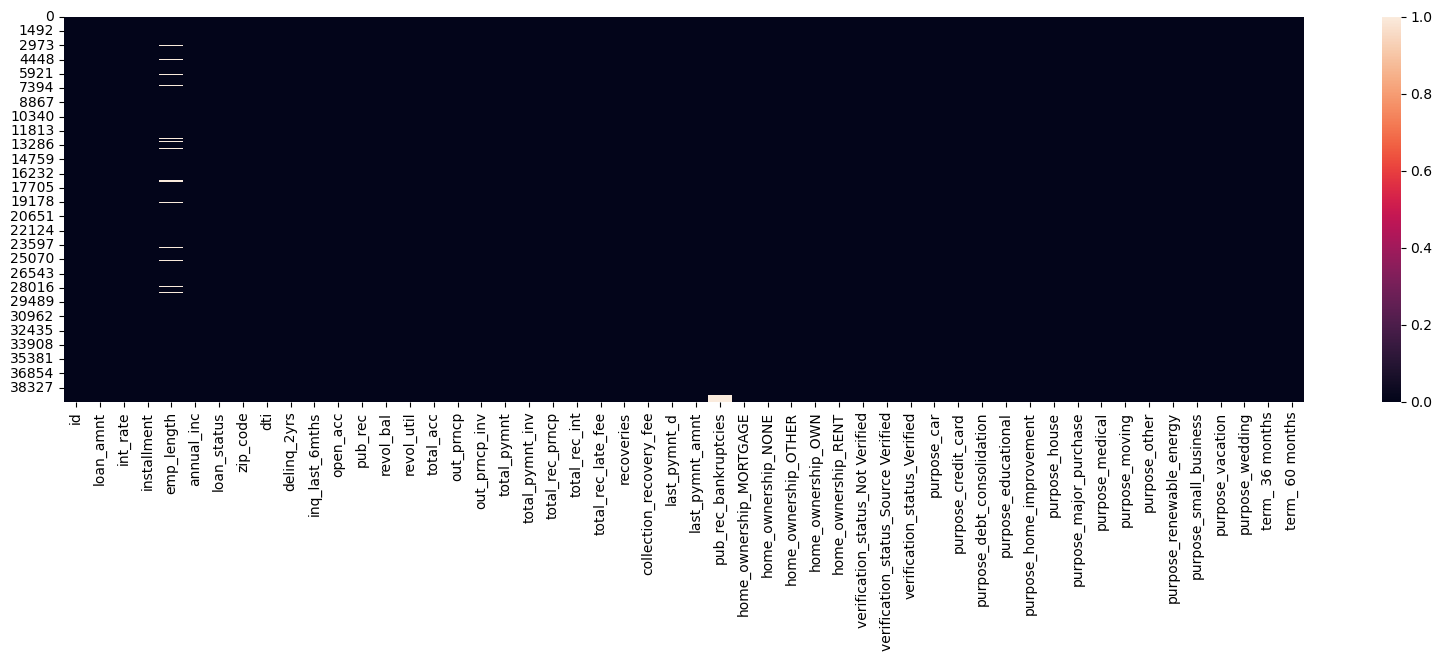

In [214]:
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.heatmap(data.isnull(), cbar=True)
plt.show()

In [216]:
# Vérification des données manquantes
missing_data = data.isnull().sum()
missing_data

id                                        0
loan_amnt                                 0
int_rate                                  0
installment                               0
emp_length                             1076
annual_inc                                0
loan_status                               0
zip_code                                  0
dti                                       0
delinq_2yrs                               0
inq_last_6mths                            0
open_acc                                  0
pub_rec                                   0
revol_bal                                 0
revol_util                               50
total_acc                                 0
out_prncp                                 0
out_prncp_inv                             0
total_pymnt                               0
total_pymnt_inv                           0
total_rec_prncp                           0
total_rec_int                             0
total_rec_late_fee              

In [217]:
data = data.drop(['pub_rec_bankruptcies'], axis=1)

In [218]:
data_m = data.copy()

- valeurs aberrentes 

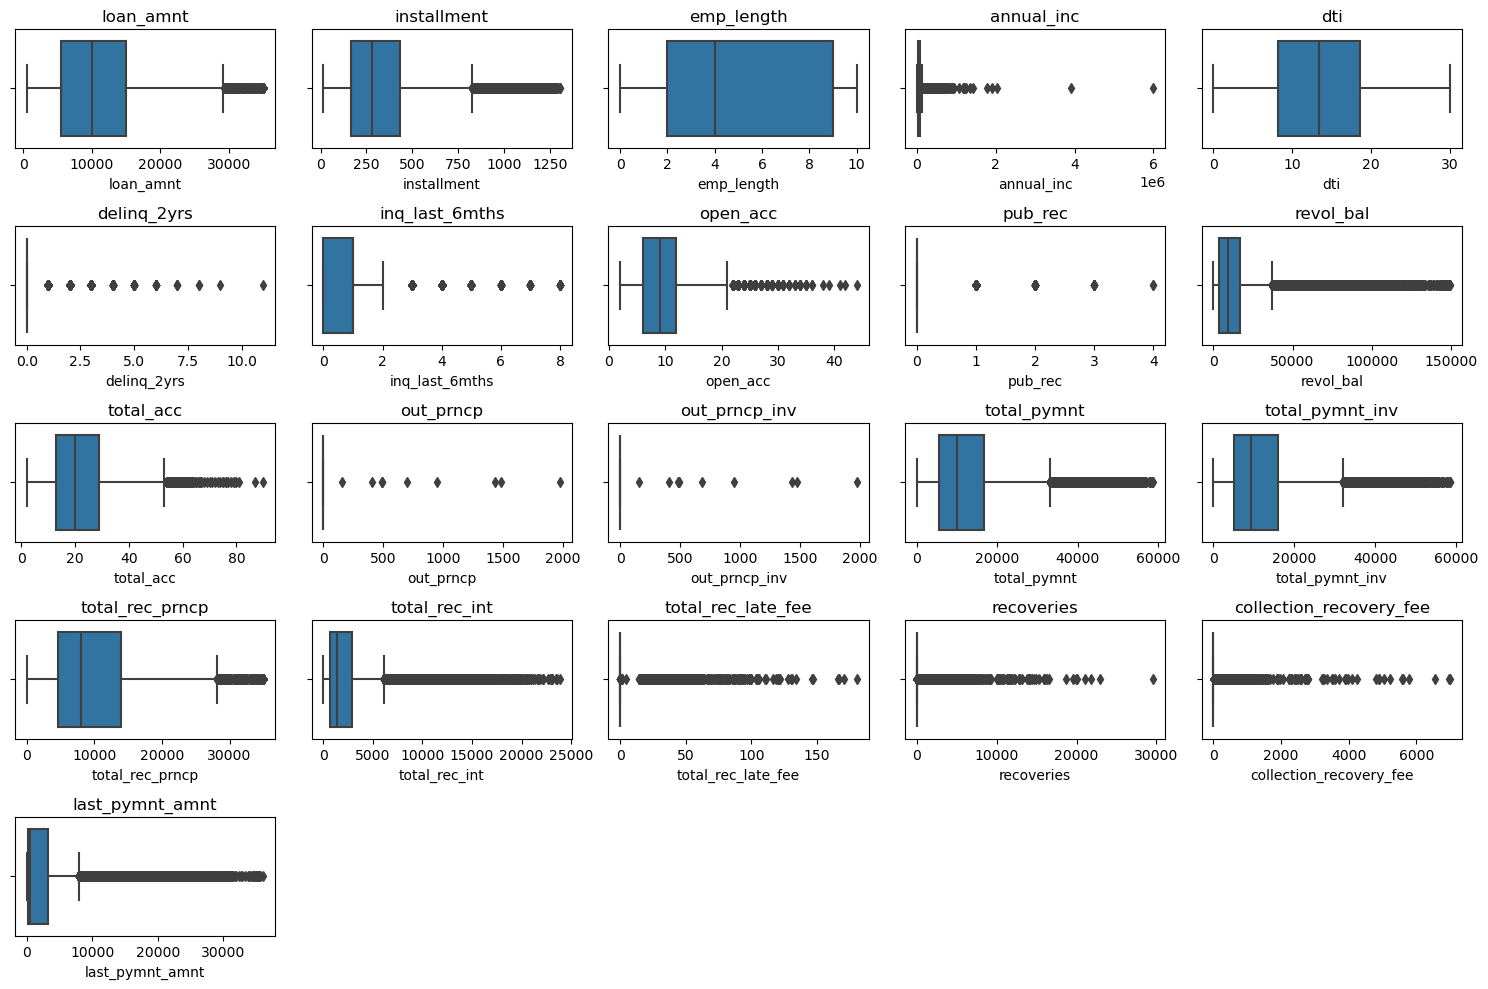

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

<Axes: >

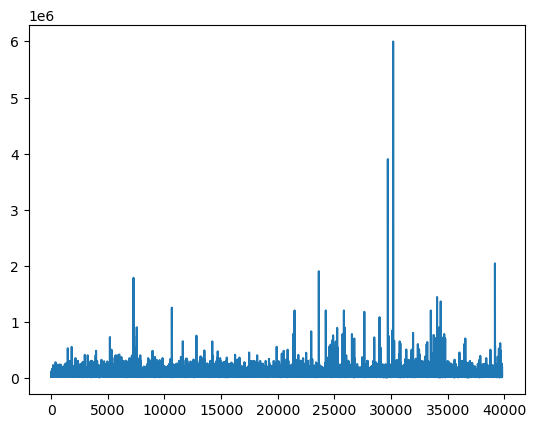

In [220]:
data['annual_inc'].plot()

In [127]:
data['annual_inc'].max()

6000000.0

In [128]:
data['annual_inc'].min()

4000.0

- Suppression des données manquantes

In [221]:
data = data.dropna()
data.isnull().sum()

id                                     0
loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
loan_status                            0
zip_code                               0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
out_prncp                              0
out_prncp_inv                          0
total_pymnt                            0
total_pymnt_inv                        0
total_rec_prncp                        0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
collection_recov

In [ ]:
#data = data.drop(columns=['zip_code'])

In [ ]:
data.dtypes

- Correlation matrix

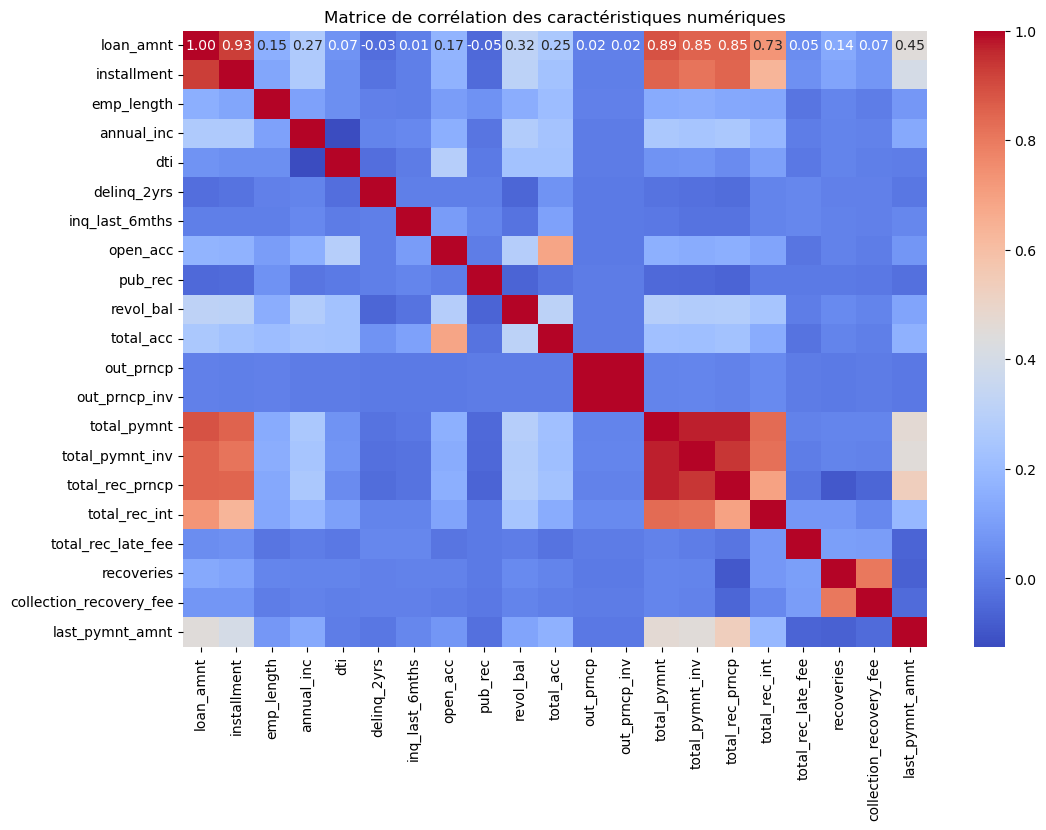

In [222]:
numeric_features = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des caractéristiques numériques')
plt.show()

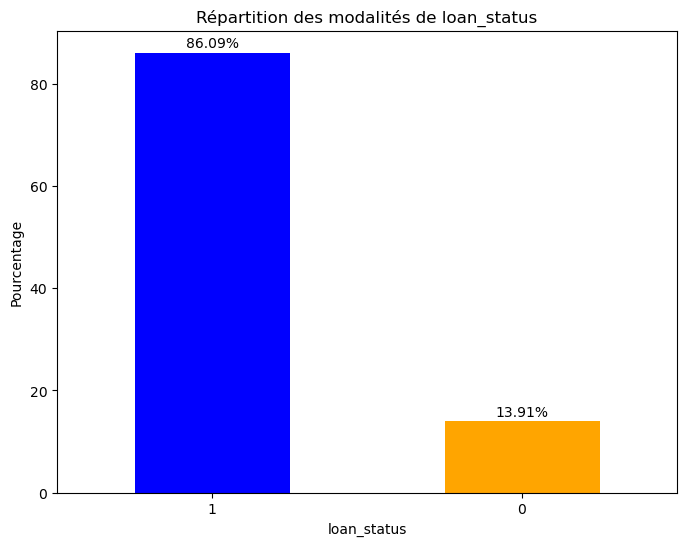

In [223]:
import matplotlib.pyplot as plt

total_samples = data.shape[0]
loan_status_percentages = data['loan_status'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
loan_status_percentages.plot(kind='bar', color=['blue', 'orange'])
plt.title('Répartition des modalités de loan_status')
plt.xlabel('loan_status')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
for i, percentage in enumerate(loan_status_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.show()

- Séparation des données 

In [224]:
bool_columns = data.select_dtypes(include=['bool']).columns
# Encodage des variables booléennes
data[bool_columns] = data[bool_columns].astype(int)

In [225]:
# Suppression des pourcentages des colonnes int_rate et revol_util
data['int_rate'] = data['int_rate'].str.replace('%', '')
data['revol_util'] = data['revol_util'].str.replace('%', '')

In [226]:
# Convertion des colonnes en type numérique après suppression du pourcentage
data['int_rate'] = pd.to_numeric(data['int_rate'])
data['revol_util'] = pd.to_numeric(data['revol_util'])

In [228]:
data

,id,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,1077501,5000.0,10.65,162.87,10.0,24000.0,1,860,27.65,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1077430,2500.0,15.27,59.83,0.0,30000.0,0,309,1.00,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1077175,2400.0,15.96,84.33,10.0,12252.0,1,606,8.72,0.0,...,0,0,0,0,0,1,0,0,1,0
3,1076863,10000.0,13.49,339.31,10.0,49200.0,1,917,20.00,0.0,...,0,0,0,1,0,0,0,0,1,0
5,1075269,5000.0,7.90,156.46,3.0,36000.0,1,852,11.20,0.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,92187,2500.0,8.07,78.42,4.0,110000.0,1,802,11.33,0.0,...,0,0,0,0,0,0,0,0,1,0
39782,90665,8500.0,10.28,275.38,3.0,18000.0,1,274,6.40,1.0,...,0,0,0,0,0,0,0,0,1,0
39783,90395,5000.0,8.07,156.84,0.0,100000.0,1,017,2.30,0.0,...,0,0,0,0,0,0,0,0,1,0
39784,90376,5000.0,7.43,155.38,0.0,200000.0,1,208,3.72,0.0,...,0,0,0,1,0,0,0,0,1,0


In [229]:
data['loan_status'].unique()

array([1, 0], dtype=object)

In [230]:
data.drop(columns=['last_pymnt_d'], inplace=True)

In [231]:
data.dtypes

id                                      object
loan_amnt                              float64
int_rate                               float64
installment                            float64
emp_length                             float64
annual_inc                             float64
loan_status                             object
zip_code                                object
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
out_prncp                              float64
out_prncp_inv                          float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int

- Séparation des données en ensembles d'entraînement et de test

In [232]:
from sklearn.preprocessing import LabelEncoder

# Création d'une instance de LabelEncoder
label_encoder = LabelEncoder()
# Application d'encodage sur la colonne 'loan_status'
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])

In [233]:
data.to_csv('data.csv', index=False)


In [146]:
X = data.drop(columns=['loan_status'])  
y = data['loan_status']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [148]:
data['loan_status']

0        1
1        0
2        1
3        1
5        1
        ..
39781    1
39782    1
39783    1
39784    1
39785    1
Name: loan_status, Length: 38572, dtype: int64

In [149]:
# Initialisation du scaler
scaler = StandardScaler()

# Sélection des colonnes numériques
numerical_cols = data.select_dtypes(include=['float64', 'int32', 'float32']).columns

- Normalisation des données numériques

In [150]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

- Création de modèle 

In [186]:
#pip install ngboost

In [152]:
# Définition des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [153]:
# Création d'un dictionnaire pour stocker les résultats
results_dict = {
    "Model": [], 
    "Accuracy": [],
    "Jaccard Score": [],
    "Hamming Loss": [],
    "Execution Time": []
}

In [154]:
# Ajout des résultats de chaque modèle dans le dictionnaire
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)  
    hamming = hamming_loss(y_test, y_pred)
    execution_time = time.time() - start_time
    
    results_dict["Model"].append(name)  
    results_dict["Accuracy"].append(accuracy)
    results_dict["Jaccard Score"].append(jaccard)
    results_dict["Hamming Loss"].append(hamming)
    results_dict["Execution Time"].append(execution_time)

# Conversion du dictionnaire en DataFrame
results_df = pd.DataFrame(results_dict)

C:\Users\amous\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
results_df

,Model,Accuracy,Jaccard Score,Hamming Loss,Execution Time
0,Logistic Regression,0.974206,0.970778,0.025794,0.527460
1,Decision Tree,0.998315,0.998040,0.001685,1.000698
2,Random Forest,0.999222,0.999096,0.000778,7.279006


#### Commentaire :

Le modèle de régression logistique semble meilleur en terme de précision (Accuracy) de 99%, un score Jaccard de 99% et une perte de Hamming de 0.009. Comparativement aux autres modèles testés (arbre de décision et forêt aléatoire), la régression logistique présente des performances compétitives en termes de précision et de score Jaccard, tout en ayant un temps d'exécution beaucoup plus court. Il sera considéré dans la suite de l'analyse.

- Performance Metrics

In [156]:
from sklearn.metrics import classification_report

# Entraînement du modèle logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

C:\Users\amous\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
# Prédiction sur les données de test
y_pred_logistic = logistic_model.predict(X_test)
report = classification_report(y_test, y_pred_logistic)
print("Classification Report - Logistic Regression:")
print(report)

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1087
           1       0.97      1.00      0.99      6628

    accuracy                           0.97      7715
   macro avg       0.98      0.92      0.94      7715
weighted avg       0.97      0.97      0.97      7715



La précision globale du modèle est de 98%, ce qui indique qu'il prédit correctement la classe des instances dans 98% des cas.

La moyenne macro des précisions, rappels et F1-scores est de899% pour la précision ede 94% de e F1-score, et de297% pour le rappel. Cela signifie que la performance du modèle est équilibrée pour les deux classes, sans biais significatif vers l'une ou l'autre.

- VC

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

- Affichage des coefficients du modèle

In [159]:
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_
features = X_train.columns
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients[0]})
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept[0]]})
coefficients_df = pd.concat([coefficients_df, intercept_df], ignore_index=True)
coefficients_df

,Feature,Coefficient
0,loan_amnt,-2.919460
1,int_rate,-0.649993
2,installment,-3.019348
3,emp_length,-0.167841
4,annual_inc,0.235933
5,zip_code,-0.001781
6,dti,-0.048414
7,delinq_2yrs,0.201349
8,inq_last_6mths,-0.044268
9,open_acc,0.062207


In [160]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap
# Calcul des valeurs SHAP pour le modèle de régression logistique
explainer = shap.Explainer(logistic_model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

- Amélioration (Gestion des données déséquilibrées)

Dans la suite nous utiliserons une technique du rééchantillonnage comme le sur-échantillonnage (SMOTE) ou le sous-échantillonnage pour équilibrer les classes dans l'ensemble de données d'entraînement.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Instanciation de l'objet SMOTE
smote = SMOTE(random_state=42)

# Sur-échantillonnage des données d'entraînement
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vérification des nouvelles tailles des données d'entraînement
print("Taille des données avant sur-échantillonnage :", len(X_train))
print("Taille des données après sur-échantillonnage :", len(X_train_resampled))

Instanciation et entraînement du modèle de régression logistique 

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instanciation et entraînement du modèle de régression logistique sur les données d'entraînement sur-échantillonnées
logistic_model_resampled = LogisticRegression()
logistic_model_resampled.fit(X_train_resampled, y_train_resampled)

C:\Users\amous\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- Évaluation du modèle sur les données de test

In [165]:
# Prédiction sur les données de test
y_pred_logistic_resampled = logistic_model_resampled.predict(X_test)

# Évaluation du modèle sur les données de test
report_resampled = classification_report(y_test, y_pred_logistic_resampled)
print("Classification Report - Logistic Regression (sur-échantillonnage SMOTE):")
print(report_resampled)

Classification Report - Logistic Regression (sur-échantillonnage SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1087
           1       0.99      0.98      0.99      6628

    accuracy                           0.98      7715
   macro avg       0.94      0.96      0.95      7715
weighted avg       0.98      0.98      0.98      7715



#### Commentaire :

###### Avant le sur-échantillonnage SMOTE :

Pour la classe 0 (défaut de paiement), la précision était de 0.99 et le rappel était de 0.94. Cela signifie que 99% des observations prédites comme étant de la classe 0 étaient réellement de la classe 0, et que 94% des observations réellement de la classe 0 ont été correctement identifiées par le modèle.

###### Après le sur-échantillonnage SMOTE :

Pour la classe 0 (défaut de paiement), la précision est restée élevée à 0.99, mais le rappel a augmenté à 0.97. Cela signifie que non seulement le modèle continue de prédire avec précision les défauts de paiement (précision élevée), mais il identifie également un plus grand pourcentage des cas réels de défaut de paiement (rappel plus élevé).

- Coefficients du modèle de régression logistique

In [166]:
# Coefficients du modèle de régression logistique
coefficients_resampled = logistic_model_resampled.coef_[0]

# Affichage des coefficients avec leurs noms de caractéristiques correspondants
coefficients_df_resampled = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_resampled})
print(coefficients_df_resampled)

                                Feature  Coefficient
0                             loan_amnt    -5.872777
1                              int_rate    -0.819586
2                           installment    -6.110176
3                            emp_length    -0.280635
4                            annual_inc     0.440648
5                              zip_code    -0.000797
6                                   dti    -0.101292
7                           delinq_2yrs     0.455322
8                        inq_last_6mths     0.148117
9                              open_acc     0.002598
10                              pub_rec    -0.008676
11                            revol_bal     0.007651
12                           revol_util     0.513121
13                            total_acc    -0.212722
14                            out_prncp    -0.671227
15                        out_prncp_inv    -0.671889
16                          total_pymnt     4.641429
17                      total_pymnt_inv     4.

- Visualisation des valeurs SHAP

In [ ]:
import shap
# Initialisation de l'explorateur SHAP avec le modèle de régression logistique
explainer = shap.Explainer(logistic_model_resampled, X_train_resampled)
# Calcul des valeurs SHAP pour les données d'entraînement sur-échantillonnées
shap_values = explainer.shap_values(X_train_resampled)
# Visualisation des valeurs SHAP
shap.summary_plot(shap_values, X_train_resampled)

-  Validation croisée

In [ ]:
from sklearn.model_selection import cross_val_score

def fit_and_cross_validate(model, X, y):
    try:
        return cross_val_score(model, X, y, cv=5, error_score='raise')
    except ValueError:
        return np.array([np.nan] * 5)  

cv_scores = fit_and_cross_validate(logistic_model_resampled, X_train_resampled, y_train_resampled)

print("Scores de validation croisée:", cv_scores)
print("Moyenne des scores de validation croisée:", np.mean(cv_scores))

- Courbe d'apprentissage

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Définition des tailles d'entraînement que vous souhaitez utiliser
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcul des scores d'apprentissage et de validation en fonction des tailles d'entraînement
train_sizes, train_scores, validation_scores = learning_curve(
    logistic_model_resampled, X_train_resampled, y_train_resampled, train_sizes=train_sizes, cv=5
)

# Calcul des scores moyens et des écarts-types des scores d'apprentissage et de validation
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Traçage de la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'apprentissage")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Score de validation")
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

- Courbe ROC après sur-échantillonnage SMOTE

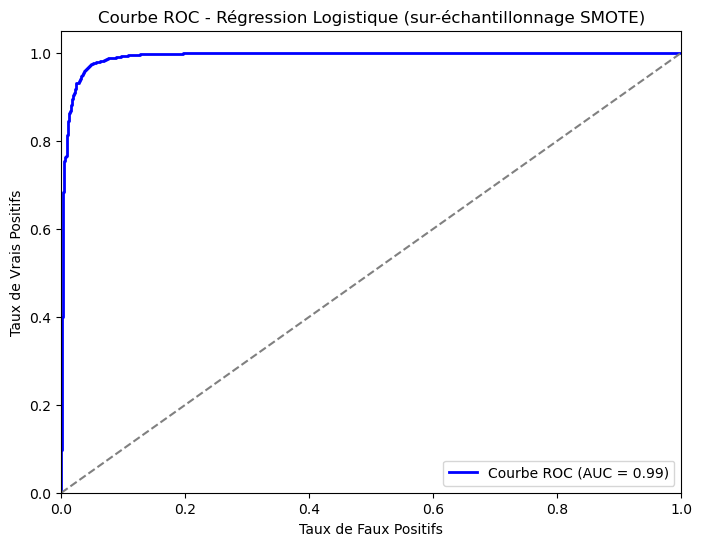

In [169]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcul des probabilités prédites pour la classe positive après sur-échantillonnage SMOTE
y_probs_resampled = logistic_model_resampled.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC après sur-échantillonnage SMOTE
fpr_resampled, tpr_resampled, _ = roc_curve(y_test, y_probs_resampled)
auc_resampled = roc_auc_score(y_test, y_probs_resampled)

# Visualisation de la courbe ROC après sur-échantillonnage SMOTE
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled, tpr_resampled, color='blue', lw=2, label='Courbe ROC (AUC = %0.2f)' % auc_resampled)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Régression Logistique (sur-échantillonnage SMOTE)')
plt.legend(loc="lower right")
plt.show()

# Choix d'un modèle qui date de moins de 5 ans

In [171]:
from ngboost import NGBClassifier
from sklearn.metrics import accuracy_score, jaccard_score, hamming_loss
import time
import pandas as pd

In [172]:
# Création du modèle NGBoost
model_ngboost = NGBClassifier()

# Entraînement du modèle NGBoost
start_time = time.time()
model_ngboost.fit(X_train, y_train)

[iter 0] loss=0.4025 val_loss=0.0000 scale=256.0000 norm=512.0000
[iter 100] loss=0.0044 val_loss=0.0000 scale=2.0000 norm=2.1214
[iter 200] loss=0.0040 val_loss=0.0000 scale=0.5000 norm=0.5370
[iter 300] loss=0.0040 val_loss=0.0000 scale=0.1250 norm=0.1347
[iter 400] loss=0.0040 val_loss=0.0000 scale=0.0156 norm=0.0169


NGBClassifier(random_state=RandomState(MT19937) at 0x17AE1FF9E40)

In [173]:
# Prédiction sur l'ensemble de test
y_pred_ngboost = model_ngboost.predict(X_test)

# Calcul des métriques
accuracy_ngboost = accuracy_score(y_test, y_pred_ngboost)
jaccard_ngboost = jaccard_score(y_test, y_pred_ngboost, average='weighted')
hamming_ngboost = hamming_loss(y_test, y_pred_ngboost)

In [174]:
# Création du DataFrame des résultats
results_df = pd.DataFrame({
    "Model": ["NGBoost"],
    "Accuracy": [accuracy_ngboost],
    "Jaccard Score": [jaccard_ngboost],
    "Hamming Loss": [hamming_ngboost],
    "Execution Time": [execution_time]
})

results_df

,Model,Accuracy,Jaccard Score,Hamming Loss,Execution Time
0,NGBoost,0.999222,0.998445,0.000778,7.279006


In [175]:
# Création et entraînement du modèle NGBoost
ngb = NGBClassifier()
ngb.fit(X_train, y_train)

# Prédictions
y_pred = ngb.predict(X_test)
y_pred_proba = ngb.predict_proba(X_test)[:, 1]

[iter 0] loss=0.4025 val_loss=0.0000 scale=256.0000 norm=512.0000
[iter 100] loss=0.0044 val_loss=0.0000 scale=2.0000 norm=2.1214
[iter 200] loss=0.0040 val_loss=0.0000 scale=0.5000 norm=0.5370
[iter 300] loss=0.0040 val_loss=0.0000 scale=0.1250 norm=0.1347
[iter 400] loss=0.0040 val_loss=0.0000 scale=0.0156 norm=0.0169


In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from ngboost import NGBClassifier

- Évaluation du modèle


In [177]:
# Évaluation du modèle
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1087
           1       1.00      1.00      1.00      6628

    accuracy                           1.00      7715
   macro avg       1.00      1.00      1.00      7715
weighted avg       1.00      1.00      1.00      7715

ROC AUC Score: 0.9996739599335761


In [178]:
ngb.get_params()


{'Dist': ngboost.distns.categorical.k_categorical.<locals>.Categorical,
 'Score': ngboost.scores.LogScore,
 'Base': DecisionTreeRegressor(criterion='friedman_mse', max_depth=3),
 'natural_gradient': True,
 'n_estimators': 500,
 'learning_rate': 0.01,
 'minibatch_frac': 1.0,
 'col_sample': 1.0,
 'verbose': True,
 'random_state': RandomState(MT19937) at 0x17AE1FF9E40}

In [179]:
# Obtention des importances des caractéristiques
feature_importances = ngb.feature_importances_
feature_importances = feature_importances.ravel()  # ou feature_importances.flatten()
features = X_train.columns
coefficients_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Importance': [ngb.score(X_train, y_train)]})
coefficients_df = pd.concat([coefficients_df, intercept_df], ignore_index=True)
print(coefficients_df)

                                Feature    Importance
0                             loan_amnt  8.533634e-16
1                              int_rate  6.482520e-03
2                           installment  3.881881e-05
3                            emp_length  0.000000e+00
4                            annual_inc  8.770235e-17
5                              zip_code  2.888088e-03
6                                   dti  4.914316e-14
7                           delinq_2yrs  0.000000e+00
8                        inq_last_6mths  0.000000e+00
9                              open_acc  1.528374e-17
10                              pub_rec  3.109454e-04
11                            revol_bal  1.192006e-13
12                           revol_util  1.142139e-14
13                            total_acc  3.265221e-03
14                            out_prncp  1.049033e-03
15                        out_prncp_inv  1.502998e-06
16                          total_pymnt  1.955639e-13
17                      tota

In [180]:
import shap
ngb.fit(X_train, y_train)
explainer = shap.TreeExplainer(ngb)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0,:])

[iter 0] loss=0.4025 val_loss=0.0000 scale=256.0000 norm=512.0000
[iter 100] loss=0.0044 val_loss=0.0000 scale=2.0000 norm=2.1214
[iter 200] loss=0.0040 val_loss=0.0000 scale=0.5000 norm=0.5370
[iter 300] loss=0.0040 val_loss=0.0000 scale=0.1250 norm=0.1347
[iter 400] loss=0.0040 val_loss=0.0000 scale=0.0156 norm=0.0169


C:\Users\amous\anaconda3\Lib\site-packages\shap\explainers\_tree.py:1185: UserWarning: Translating model_output="raw" to model_output=0 for the 0-th parameter in the distribution. Use model_output=0 directly to avoid this warning.
  warnings.warn("Translating model_output=\"raw\" to model_output=0 for the 0-th parameter in the distribution. Use model_output=0 directly to avoid this warning.")


- Courbe d'apprentissage 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# tailles des ensembles de données pour la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    estimator=ngb,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  
    scoring='accuracy',  
    cv=5  
)

# moyennes et les écarts-types des scores d'apprentissage et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

- Courbe ROC 

[iter 0] loss=0.4025 val_loss=0.0000 scale=256.0000 norm=512.0000
[iter 100] loss=0.0044 val_loss=0.0000 scale=2.0000 norm=2.1214
[iter 200] loss=0.0040 val_loss=0.0000 scale=0.5000 norm=0.5370
[iter 300] loss=0.0040 val_loss=0.0000 scale=0.1250 norm=0.1347
[iter 400] loss=0.0040 val_loss=0.0000 scale=0.0156 norm=0.0169


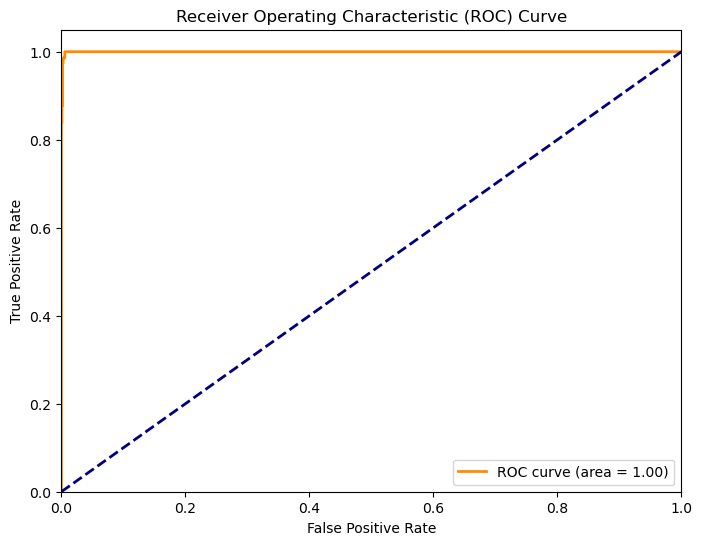

In [181]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

ngb.fit(X_train, y_train)
y_pred_proba = ngb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Commentaire :

Le modèle NGBoost affiche des performances comparables voire supérieures à celles des techniques précédentes. Il offre une précision et un score Jaccard élevés tout en maintenant un faible taux de perte. De plus, l'utilisation de NGBoost permet une meilleure interprétabilité grâce à la possibilité d'obtenir les importances des caractéristiques.

L’analyse de la feature importance globale et locale du nouveau modèle 
L'analyse de l'importance des caractéristiques (feature importance) globale et locale du nouveau modèle NGBoost permet de comprendre quelles caractéristiques ont le plus d'impact sur les prédictions globales du modèle et comment ces caractéristiques influent sur les prédictions individuelles.

Importance des Caractéristiques Globale
L'importance globale des caractéristiques nous indique l'impact relatif de chaque variable sur les prédictions du modèle à l'échelle de l'ensemble des données. Cette analyse permet d'identifier les caractéristiques les plus importantes pour le modèle dans son ensemble.
D'après l'analyse de l'importance globale des caractéristiques avec NGBoost, nous pouvons observer les caractéristiques les plus influentes sur les prédictions globales du modèle. Par exemple, les caractéristiques telles que le montant du prêt (loan_amnt), le taux d'intérêt (int_rate), le montant de l'acompte (installment), et le montant total payé (total_pymnt) peuvent avoir une influence significative sur les décisions de prêt.

Importance des Caractéristiques Locale
L'importance locale des caractéristiques, parfois appelée feature contribution ou SHAP values, nous fournit des informations sur l'impact spécifique de chaque caractéristique pour chaque prédiction individuelle. Cette analyse nous permet de comprendre comment chaque caractéristique contribue à la prédiction pour des cas spécifiques.
En examinant l'importance locale des caractéristiques avec NGBoost, nous pouvons voir comment chaque caractéristique influence les prédictions pour des prêts individuels. Par exemple, nous pouvons constater que pour certains prêts, le montant du prêt ou le taux d'intérêt peuvent être des facteurs déterminants dans la décision d'octroi du prêt, tandis que pour d'autres prêts, d'autres caractéristiques telles que le revenu annuel ou le nombre d'années d'expérience peuvent jouer un rôle plus important.

